In [78]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as colors
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pathlib import Path
from scipy.stats import gaussian_kde
import seaborn as sns

from matplotlib.lines import Line2D
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [79]:
m = 0.31
n = 200.0
o = 0.5

model_path = '/Volumes/ASTRO/Sim 4'
model_ver = 'SIE_POS_SHEAR_' + str(m) + '_' + str(n) + '_' + str(o)  + '_lens.fits'

hdu_list = fits.open(model_path + '/' + model_ver)
hdu_list.info()

# Extract kappa 
alpha_x = hdu_list[0].data[0]
alpha_x = np.array(alpha_x)

alpha_y = hdu_list[0].data[1]
alpha_y = np.array(alpha_y)

Filename: /Volumes/ASTRO/Sim 4/SIE_POS_SHEAR_0.31_200.0_0.5_lens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (156, 156, 8)   float32   


In [80]:
height, width = alpha_x.shape
center = (width // 2, height // 2)
end = (width, height//2)

alpha_radial_sim_x = alpha_x[center[1], center[0]:end[0]]
alpha_radial_sim_y = alpha_y[center[1], center[0]:end[0]]

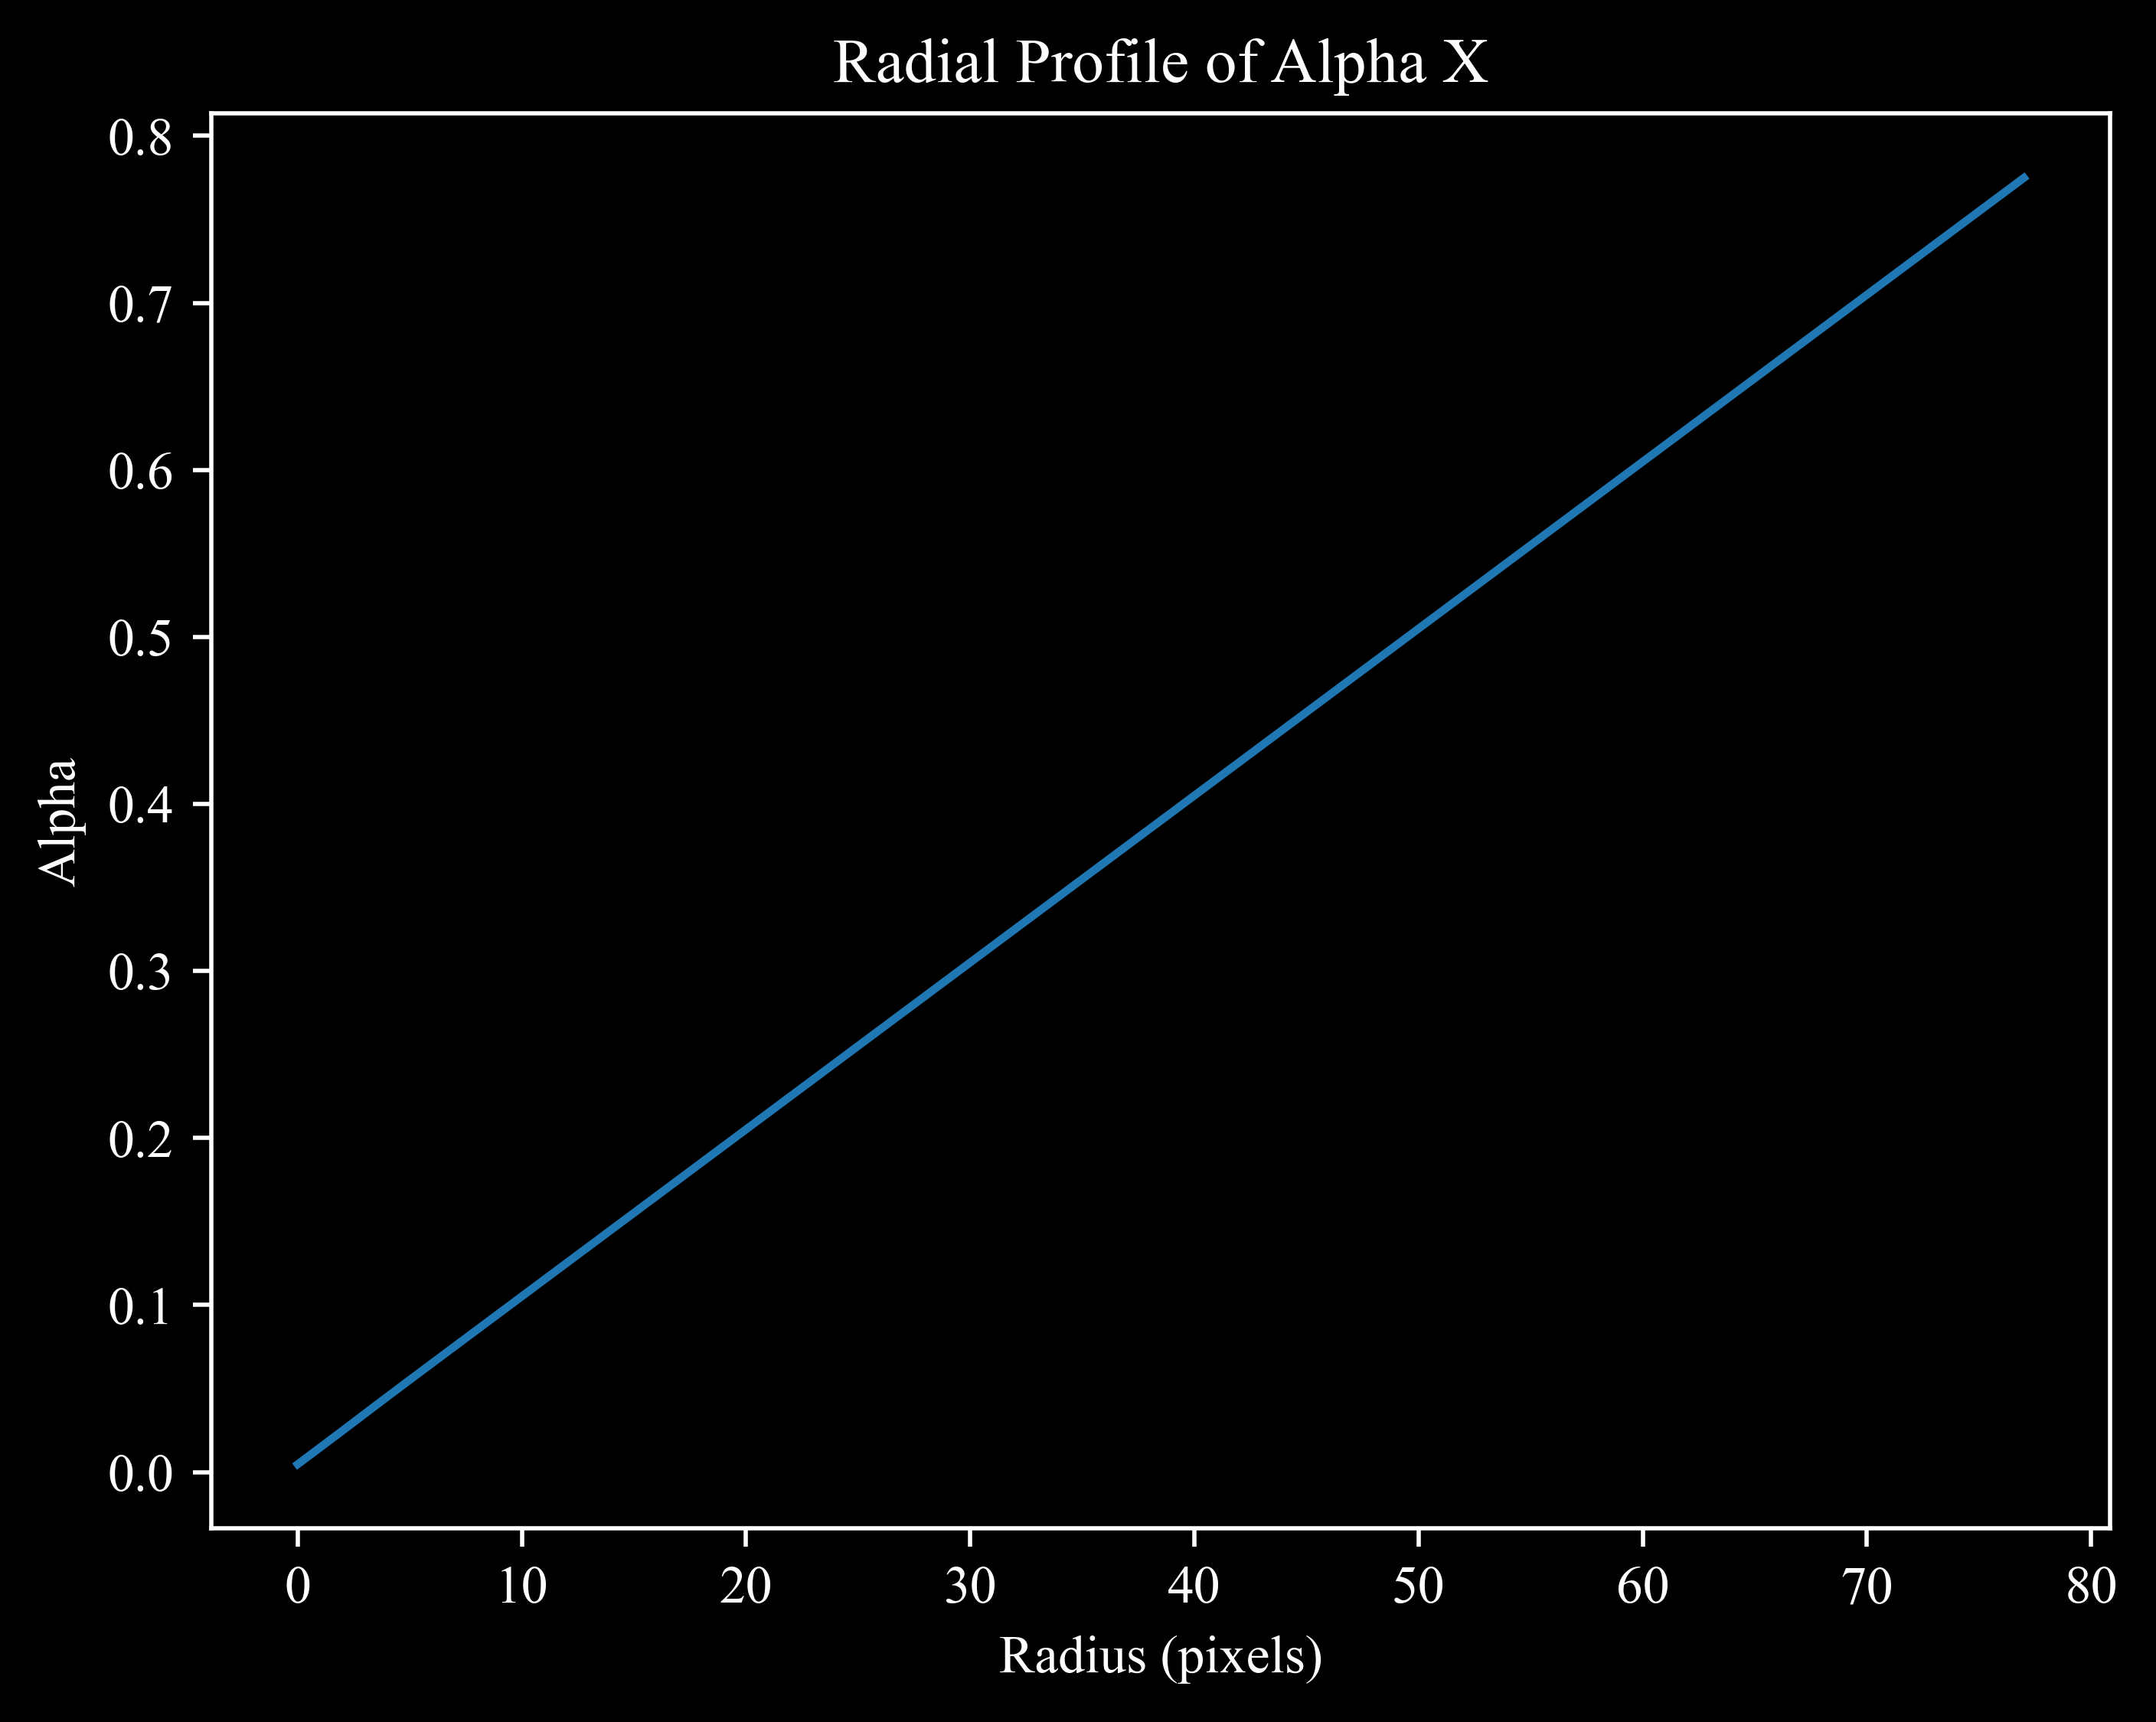

In [81]:
plt.plot(np.arange(len(alpha_radial_sim_x)), alpha_radial_sim_x, linewidth=1.5)
plt.xlabel('Radius (pixels)', color='w')
plt.ylabel('Alpha', color='w')
plt.title('Radial Profile of Alpha X', color='w')
plt.show()

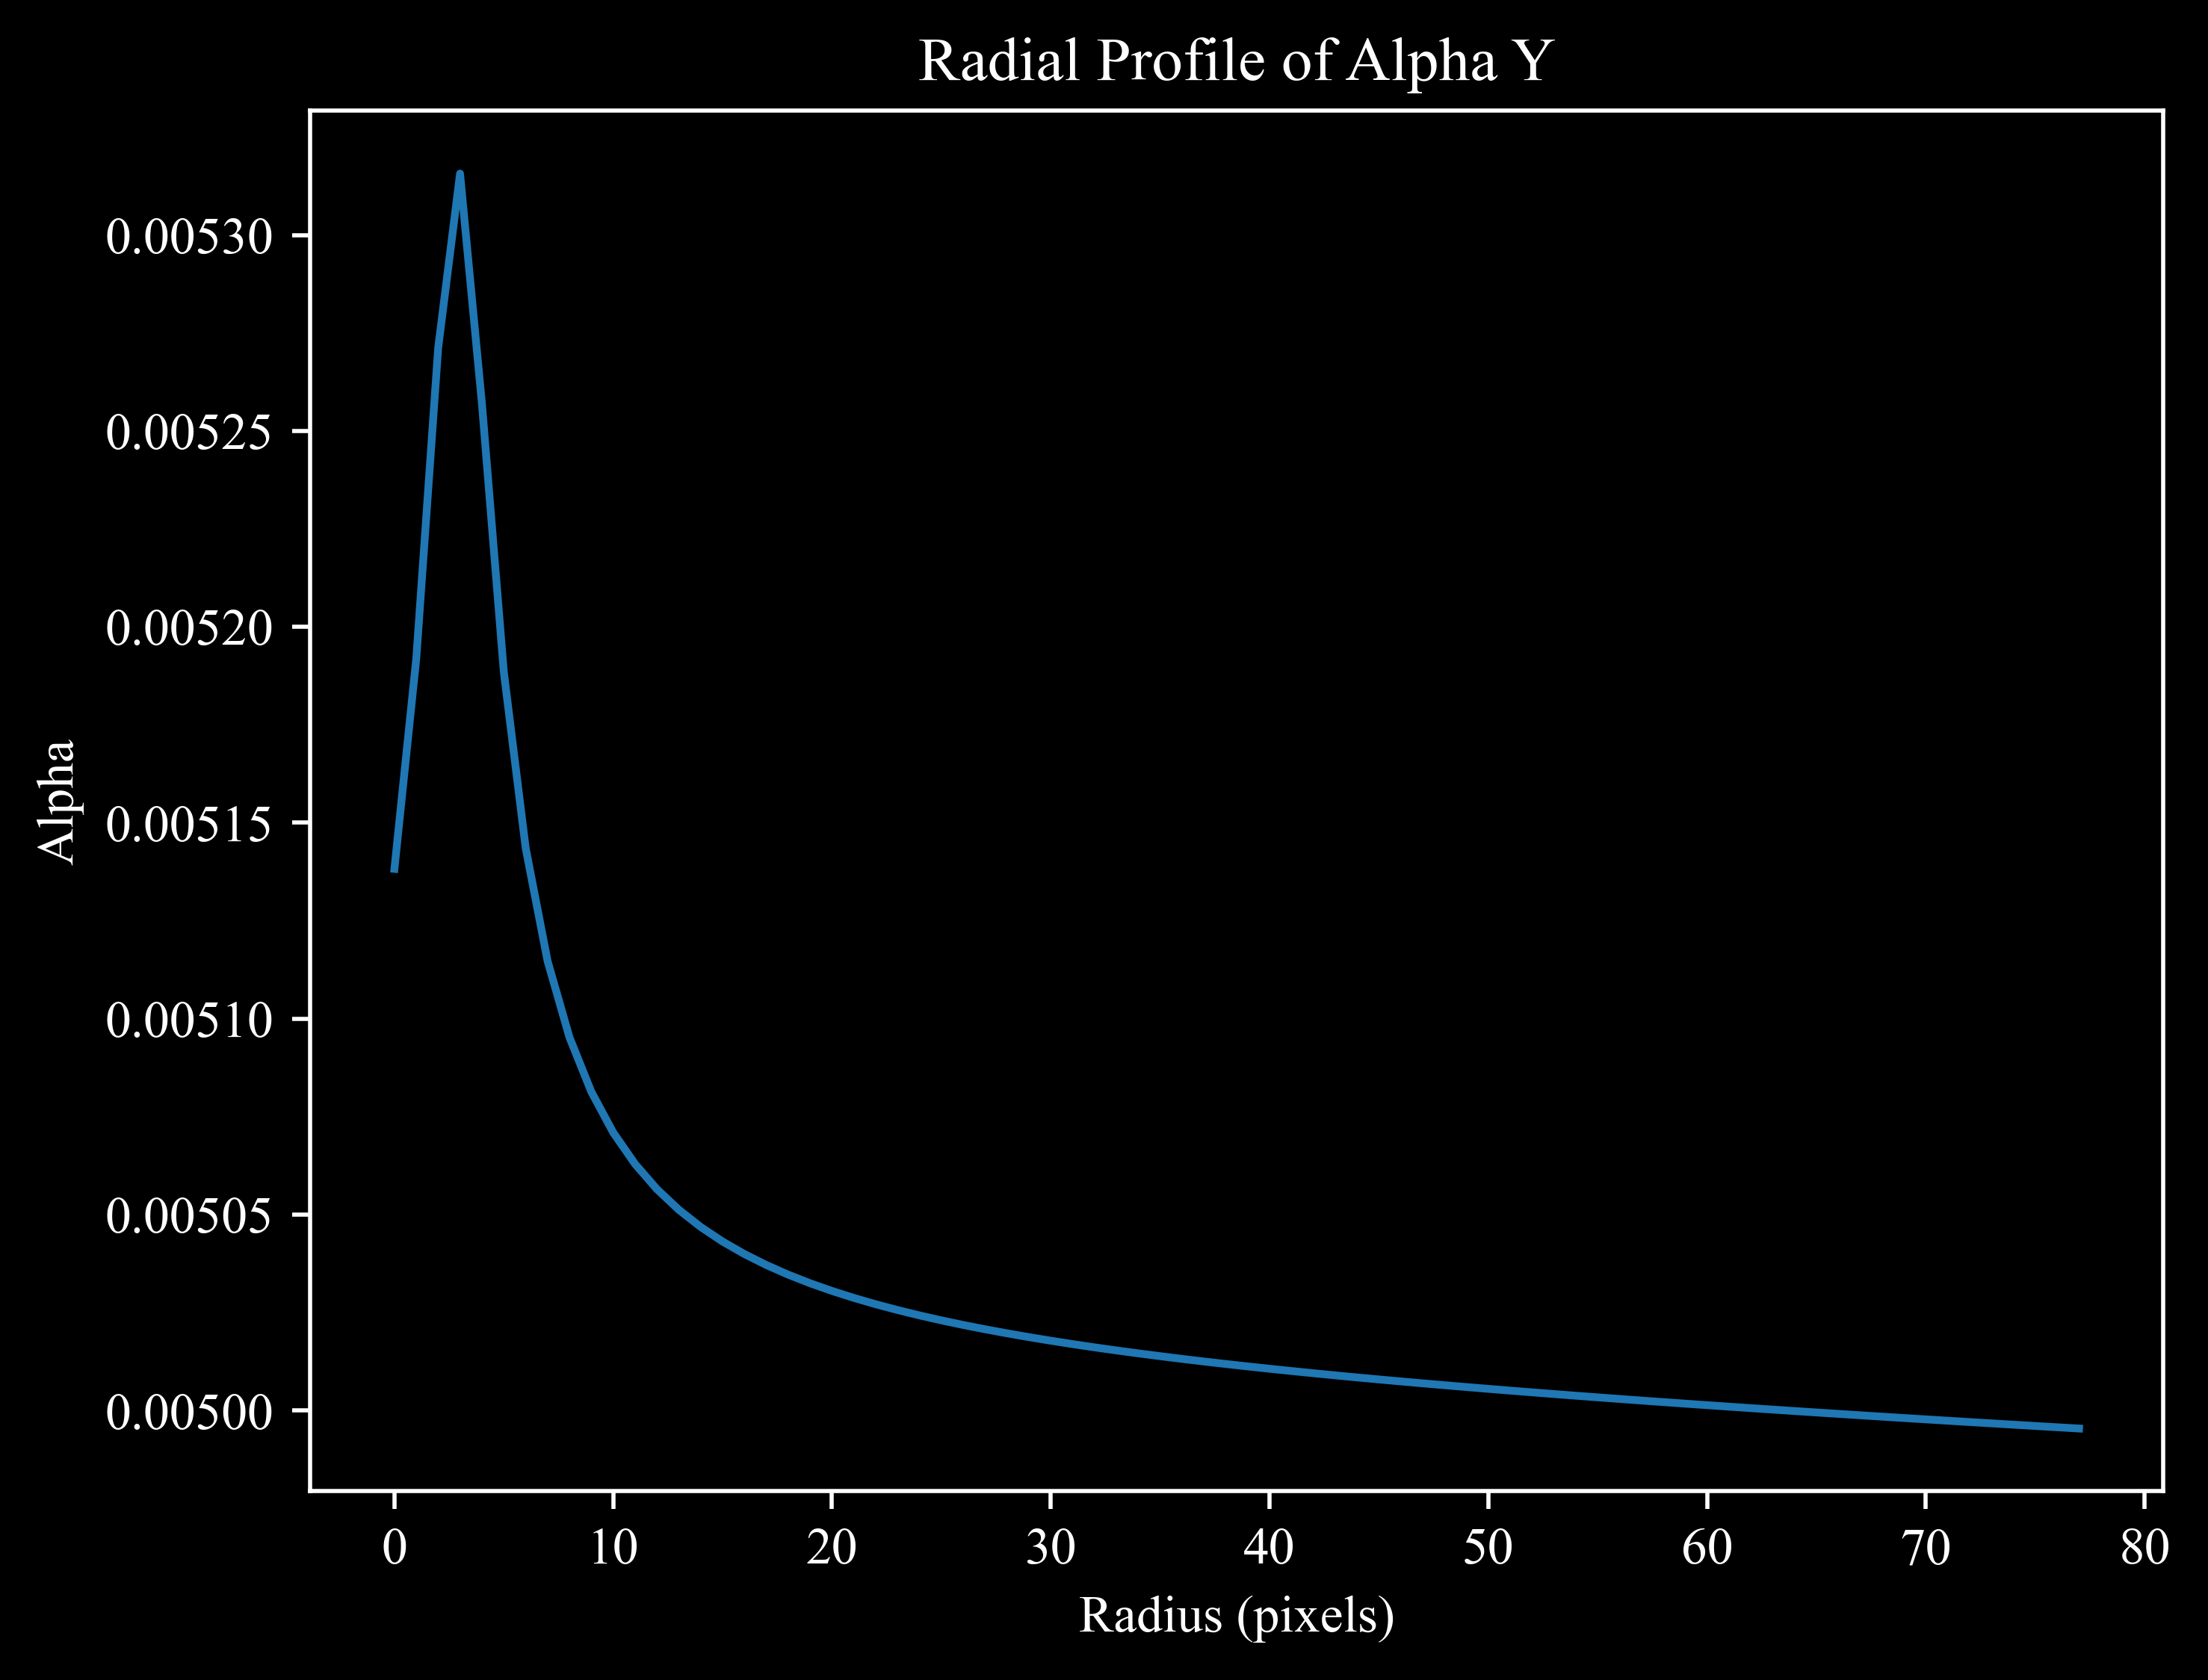

In [82]:
plt.plot(np.arange(len(alpha_radial_sim_y)), alpha_radial_sim_y, linewidth=1.5)
plt.xlabel('Radius (pixels)', color='w')
plt.ylabel('Alpha', color='w')
plt.title('Radial Profile of Alpha Y', color='w')
plt.show()

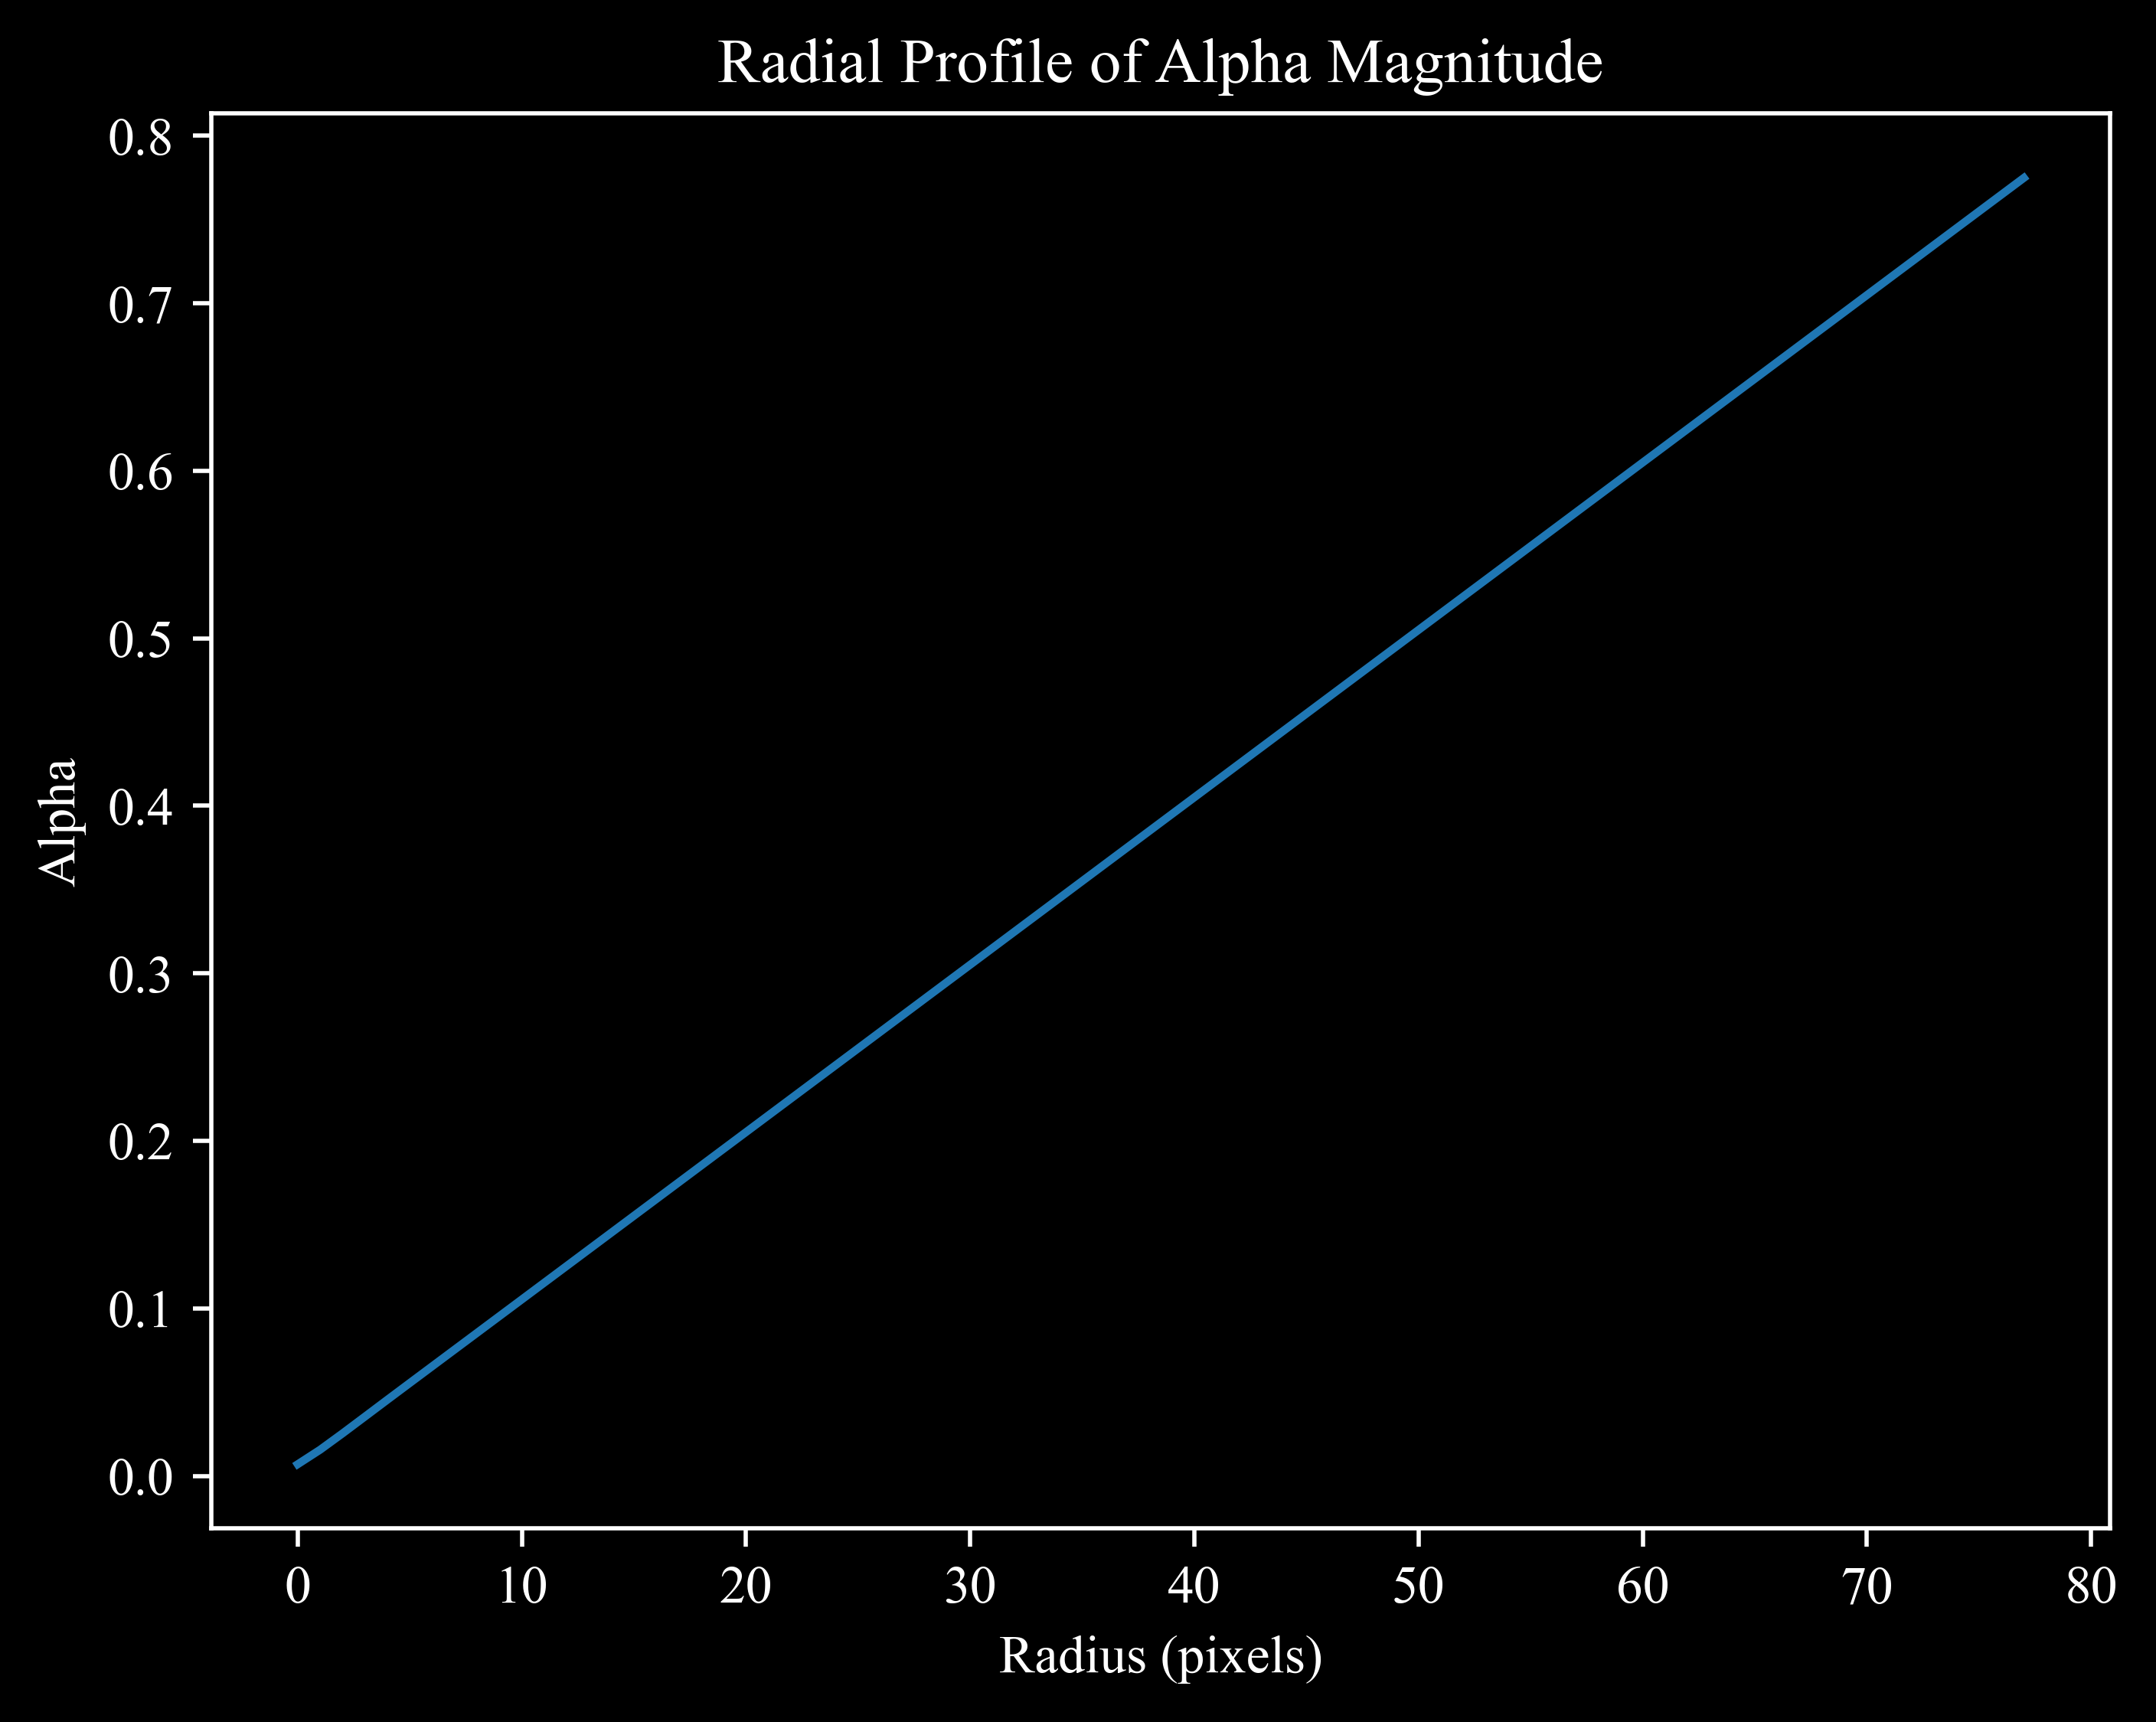

In [83]:
alpha_radial_sim_sum = np.sqrt(alpha_radial_sim_x**2 + alpha_radial_sim_y**2)

plt.plot(np.arange(len(alpha_radial_sim_sum)), alpha_radial_sim_sum, linewidth=1.5)
plt.xlabel('Radius (pixels)', color='w')
plt.ylabel('Alpha', color='w')
plt.title('Radial Profile of Alpha Magnitude', color='w')
plt.show()

In [84]:
model_path = '/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling/SIE+SHEAR'
model_ver = 'SIE_POS_SHEAR_lens.fits'

hdu_list = fits.open(model_path + '/' + model_ver)
hdu_list.info()

# Extract kappa 
alpha_x = hdu_list[0].data[0]
alpha_x = np.array(alpha_x)

alpha_y = hdu_list[0].data[1]
alpha_y = np.array(alpha_y)

Filename: /Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling/SIE+SHEAR/SIE_POS_SHEAR_lens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (156, 156, 8)   float32   


In [85]:
height, width = alpha_x.shape
center = (width // 2, height // 2)
end = (width, height//2)

alpha_radial_x = alpha_x[center[1], center[0]:end[0]]
alpha_radial_y = alpha_y[center[1], center[0]:end[0]]

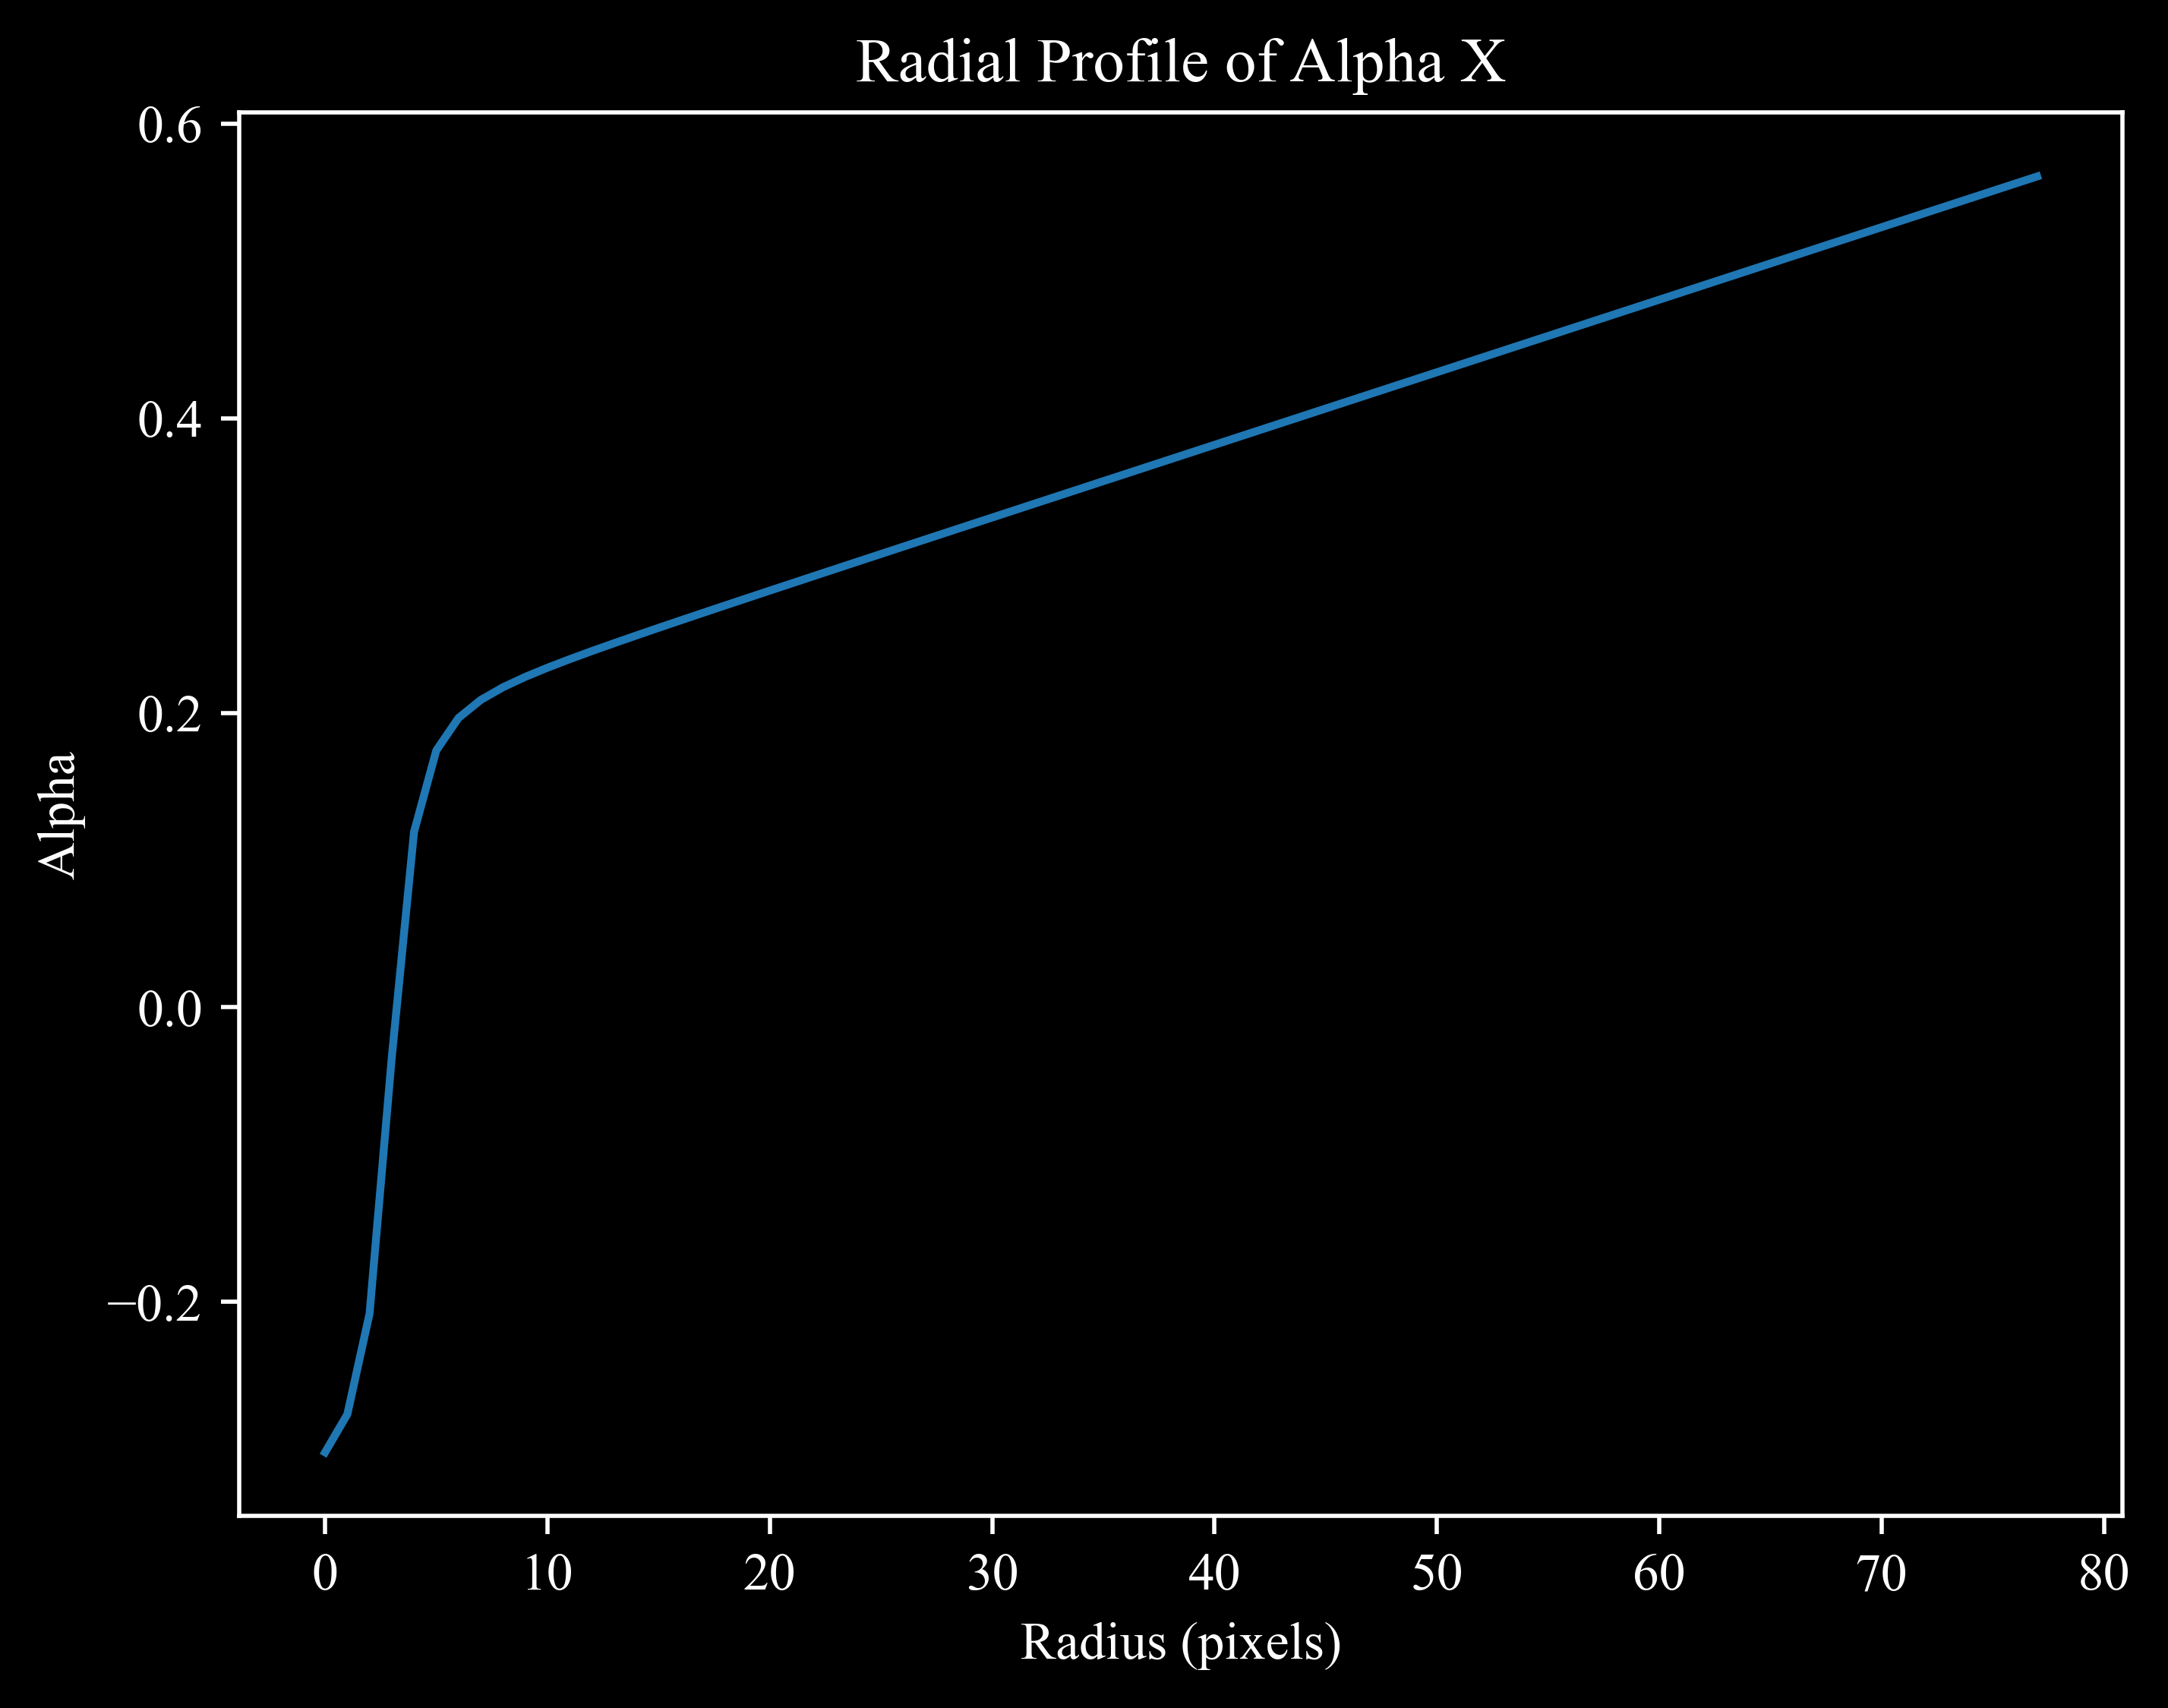

In [86]:
plt.plot(np.arange(len(alpha_radial_x)), alpha_radial_x, linewidth=1.5, label='SIE Alpha X')
plt.xlabel('Radius (pixels)', color='w')
plt.ylabel('Alpha', color='w')
plt.title('Radial Profile of Alpha X', color='w')
plt.show()

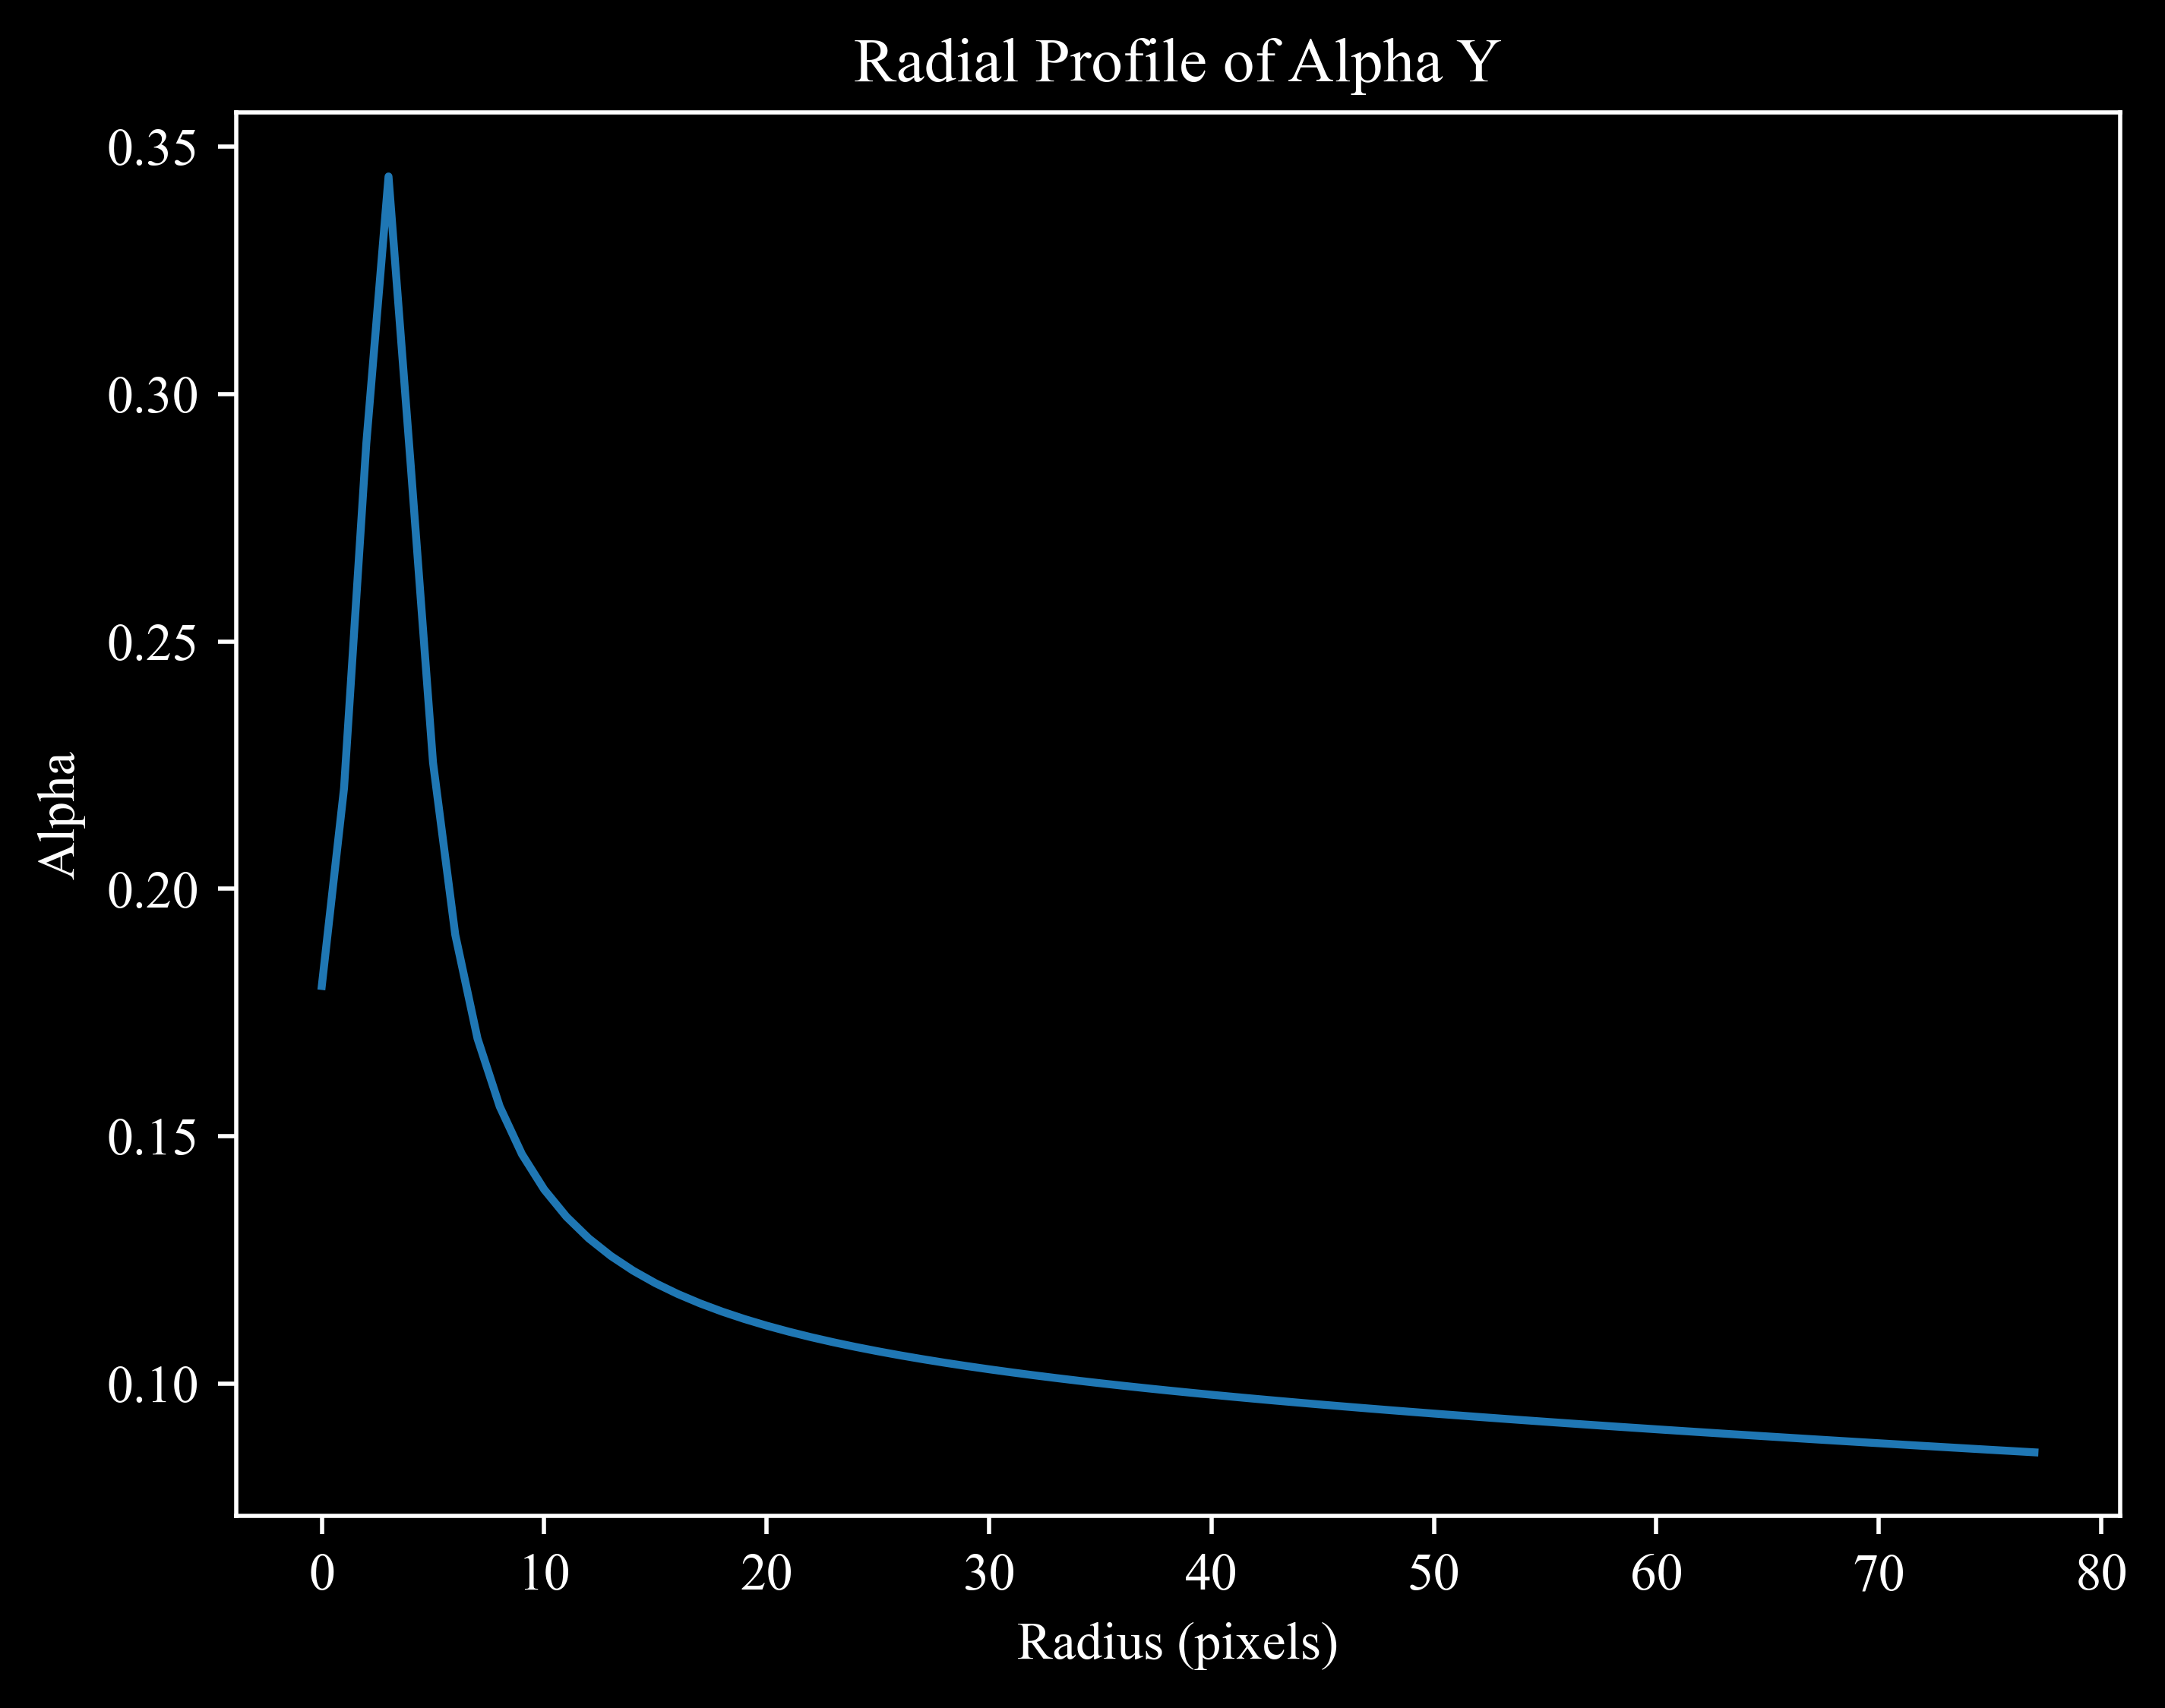

In [87]:
plt.plot(np.arange(len(alpha_radial_y)), alpha_radial_y, linewidth=1.5)
plt.xlabel('Radius (pixels)', color='w')
plt.ylabel('Alpha', color='w')
plt.title('Radial Profile of Alpha Y', color='w')
plt.show()

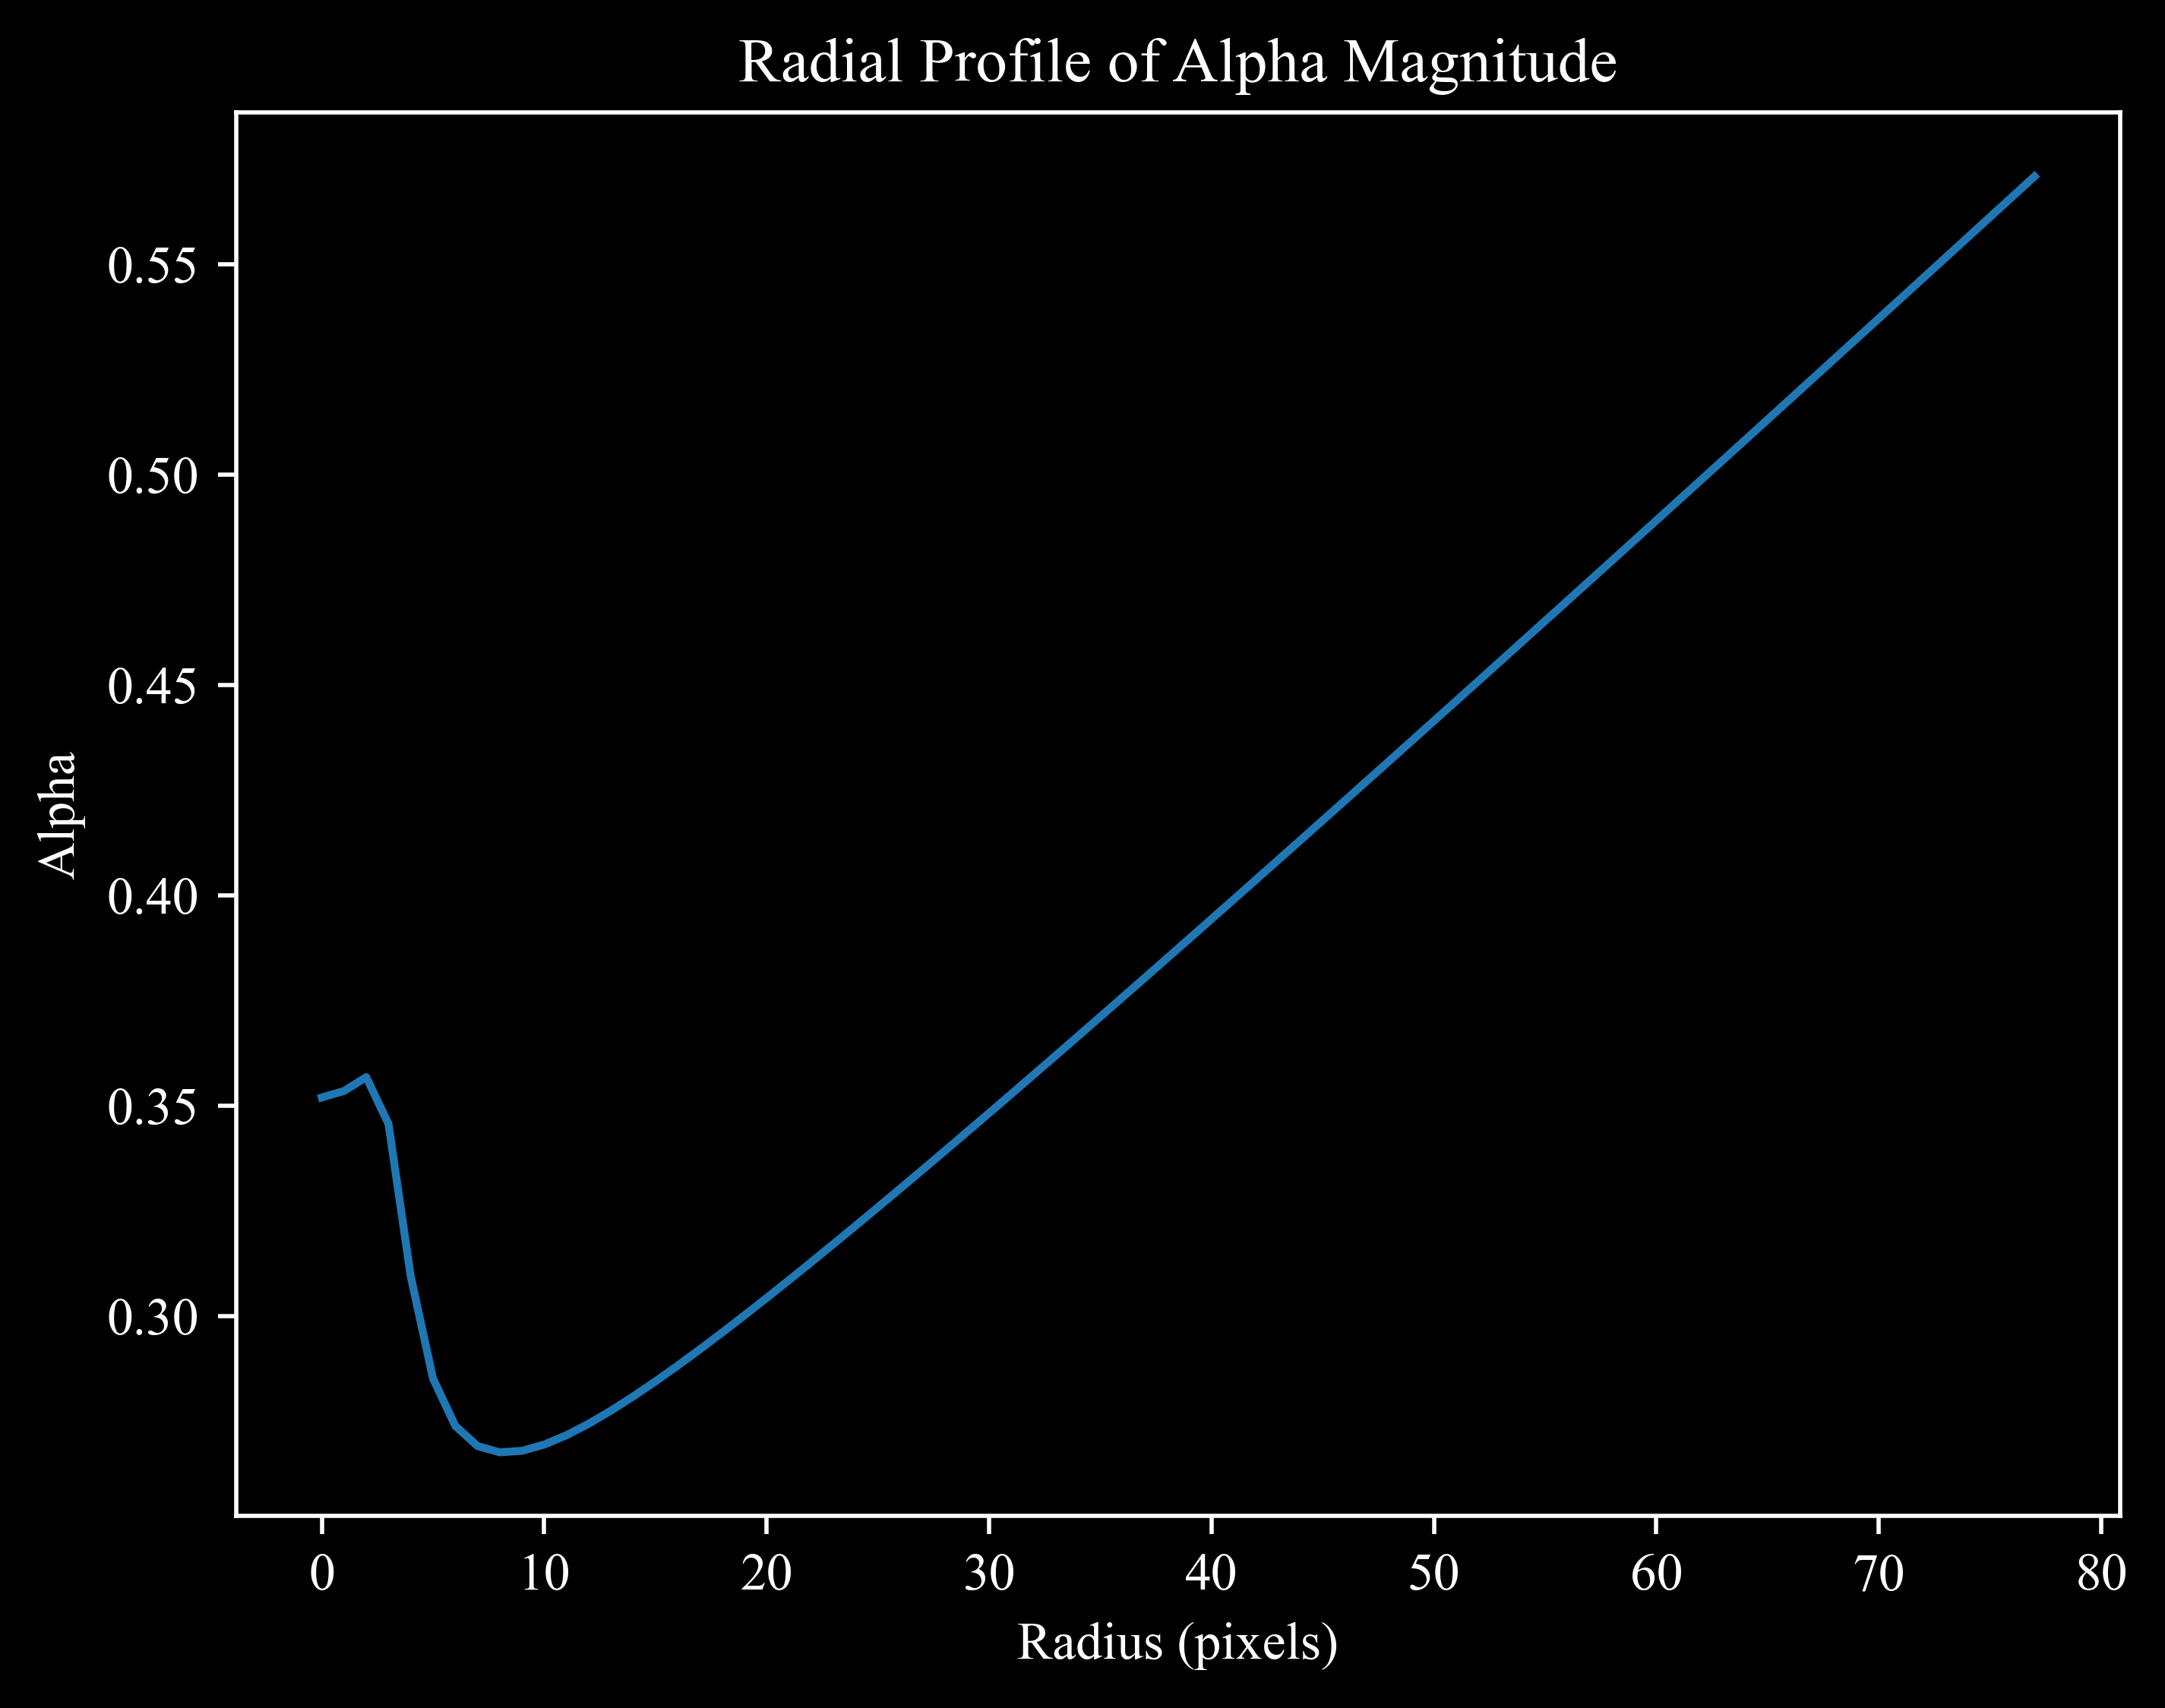

In [88]:
alpha_radial_sum = np.sqrt(alpha_radial_x**2 + alpha_radial_y**2)

plt.plot(np.arange(len(alpha_radial_sum)), alpha_radial_sum, linewidth=1.5)
plt.xlabel('Radius (pixels)', color='w')
plt.ylabel('Alpha', color='w')
plt.title('Radial Profile of Alpha Magnitude', color='w')
plt.show()

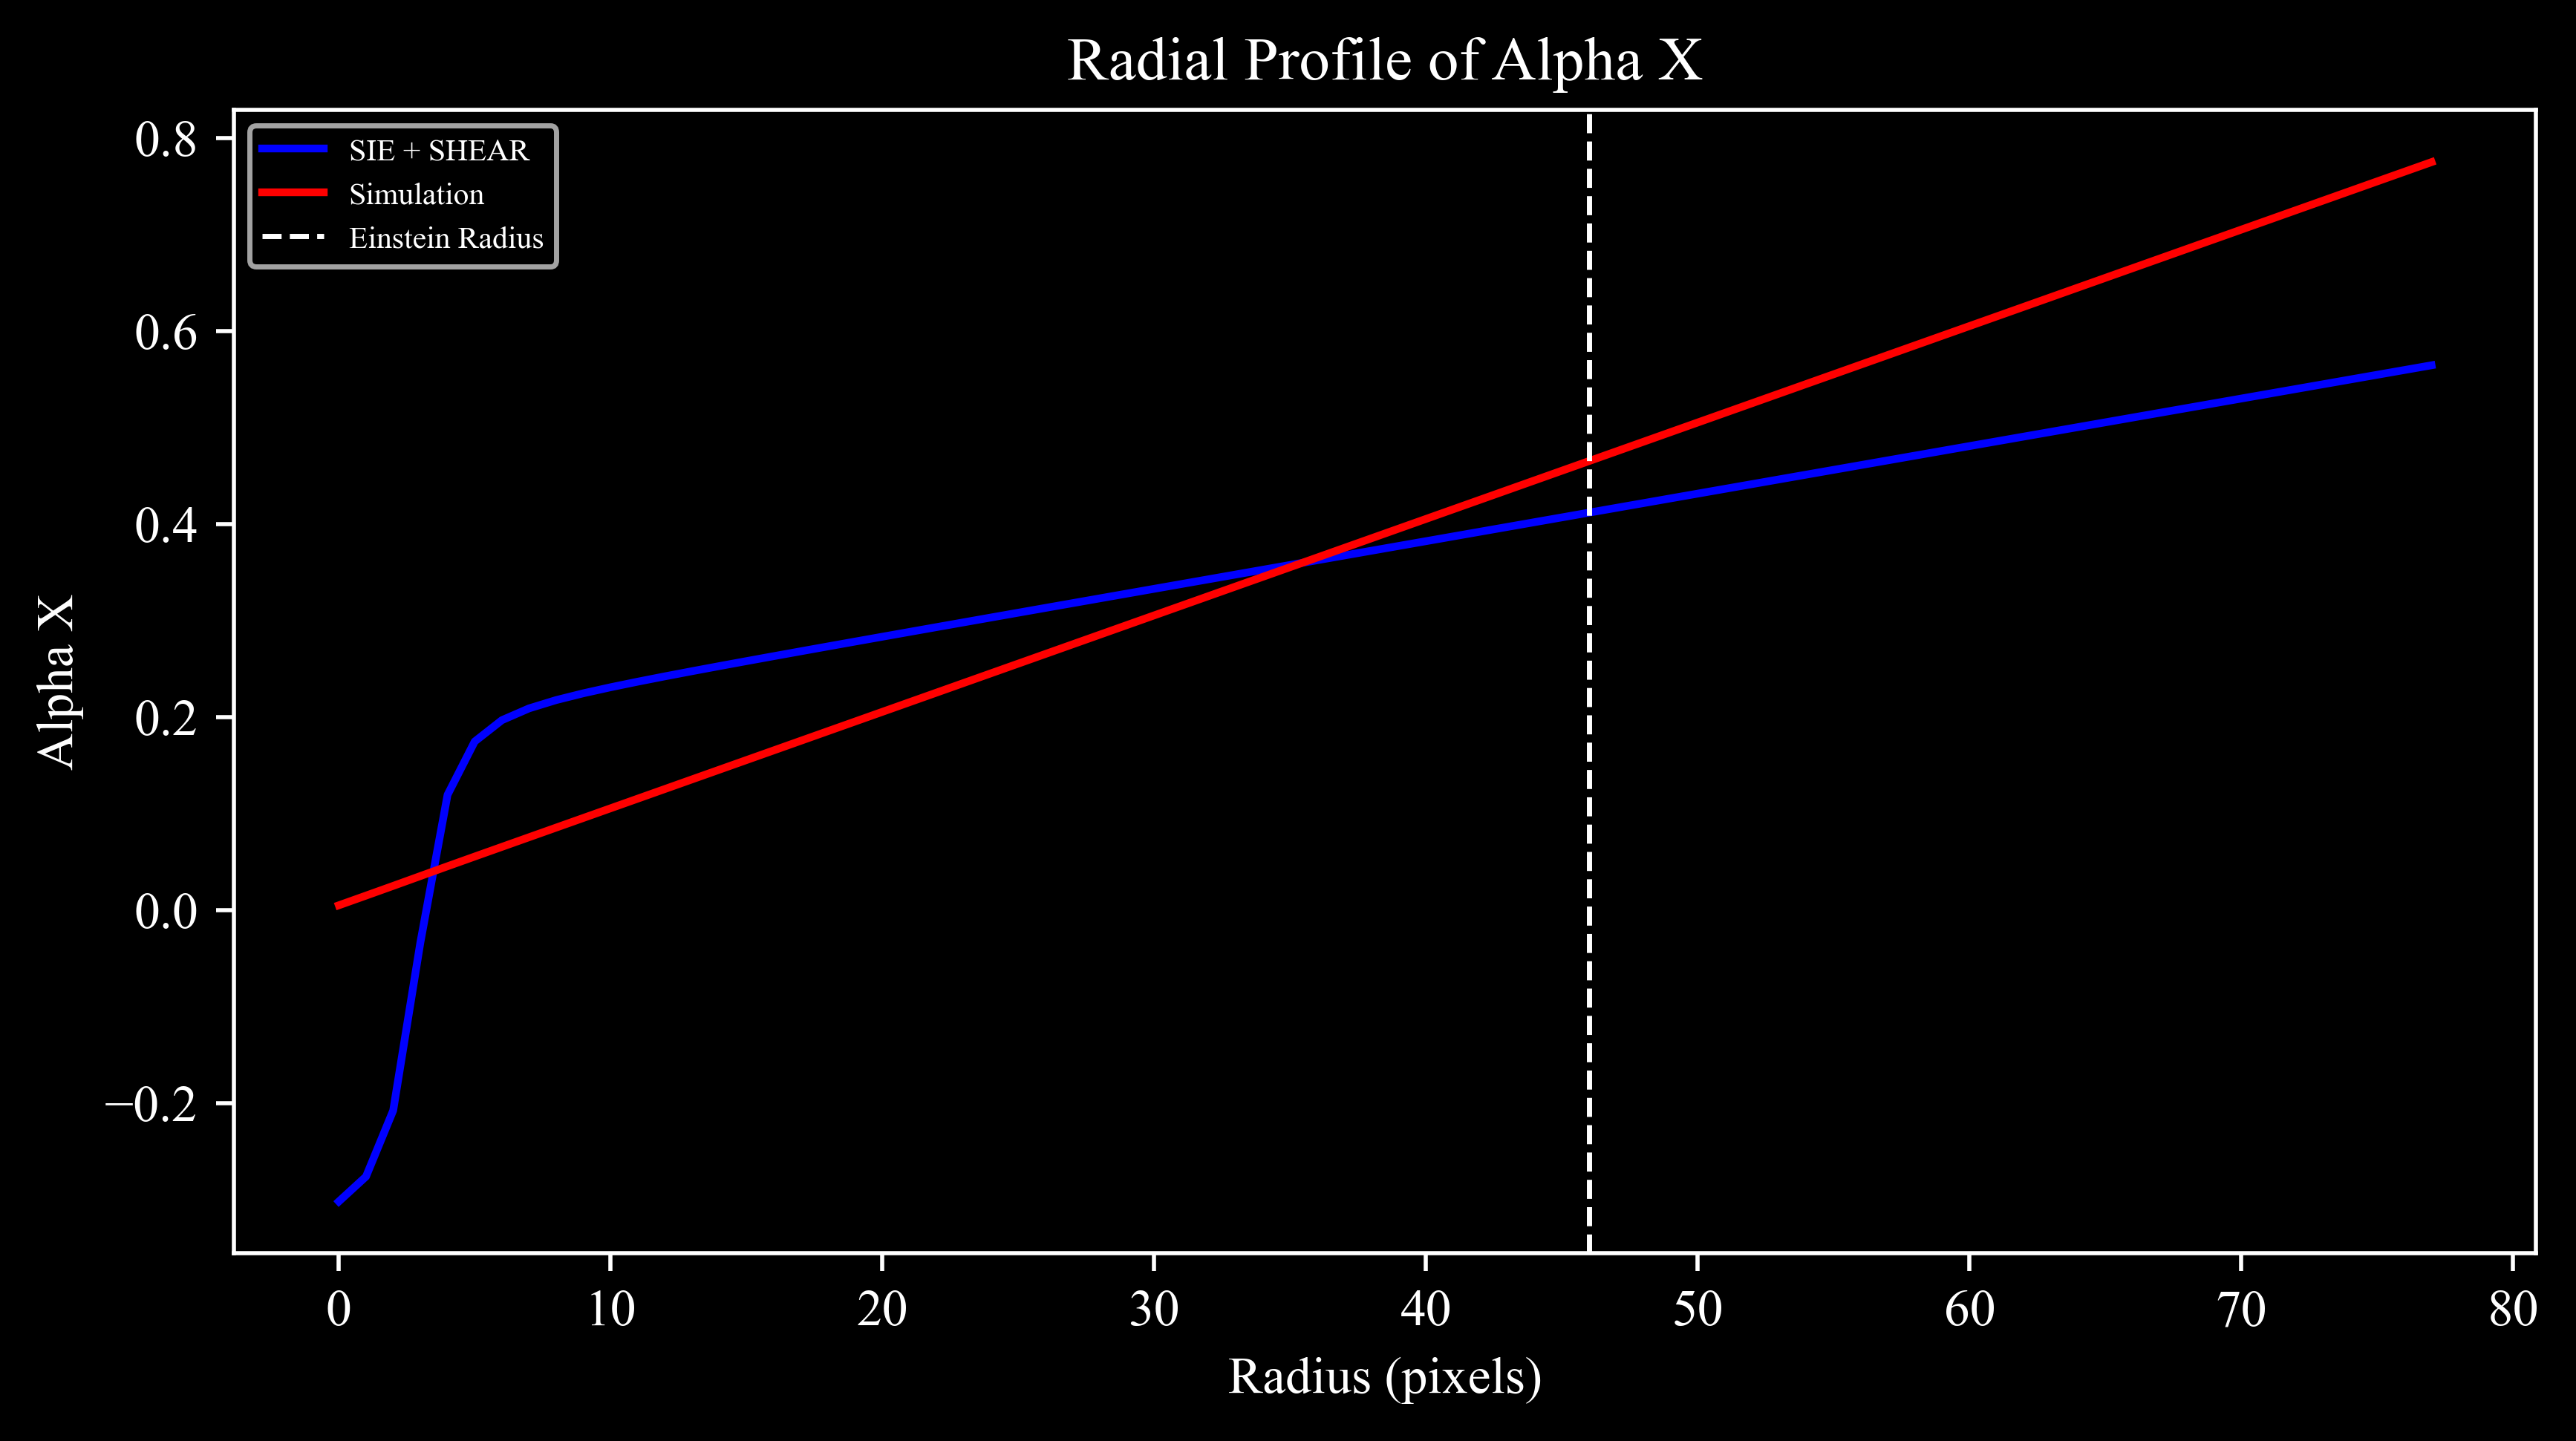

In [89]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(alpha_radial_x)), alpha_radial_x, color='b', label='SIE + SHEAR')
plt.plot(np.arange(len(alpha_radial_sim_x)), alpha_radial_sim_x, color='r', label='Simulation')
plt.axvline(x=46, color='w', linestyle='--', linewidth=1, label='Einstein Radius')
plt.xlabel('Radius (pixels)', color='w')
plt.ylabel('Alpha X', color='w')
plt.title('Radial Profile of Alpha X', color='w')
plt.legend(fontsize=6)
plt.show()

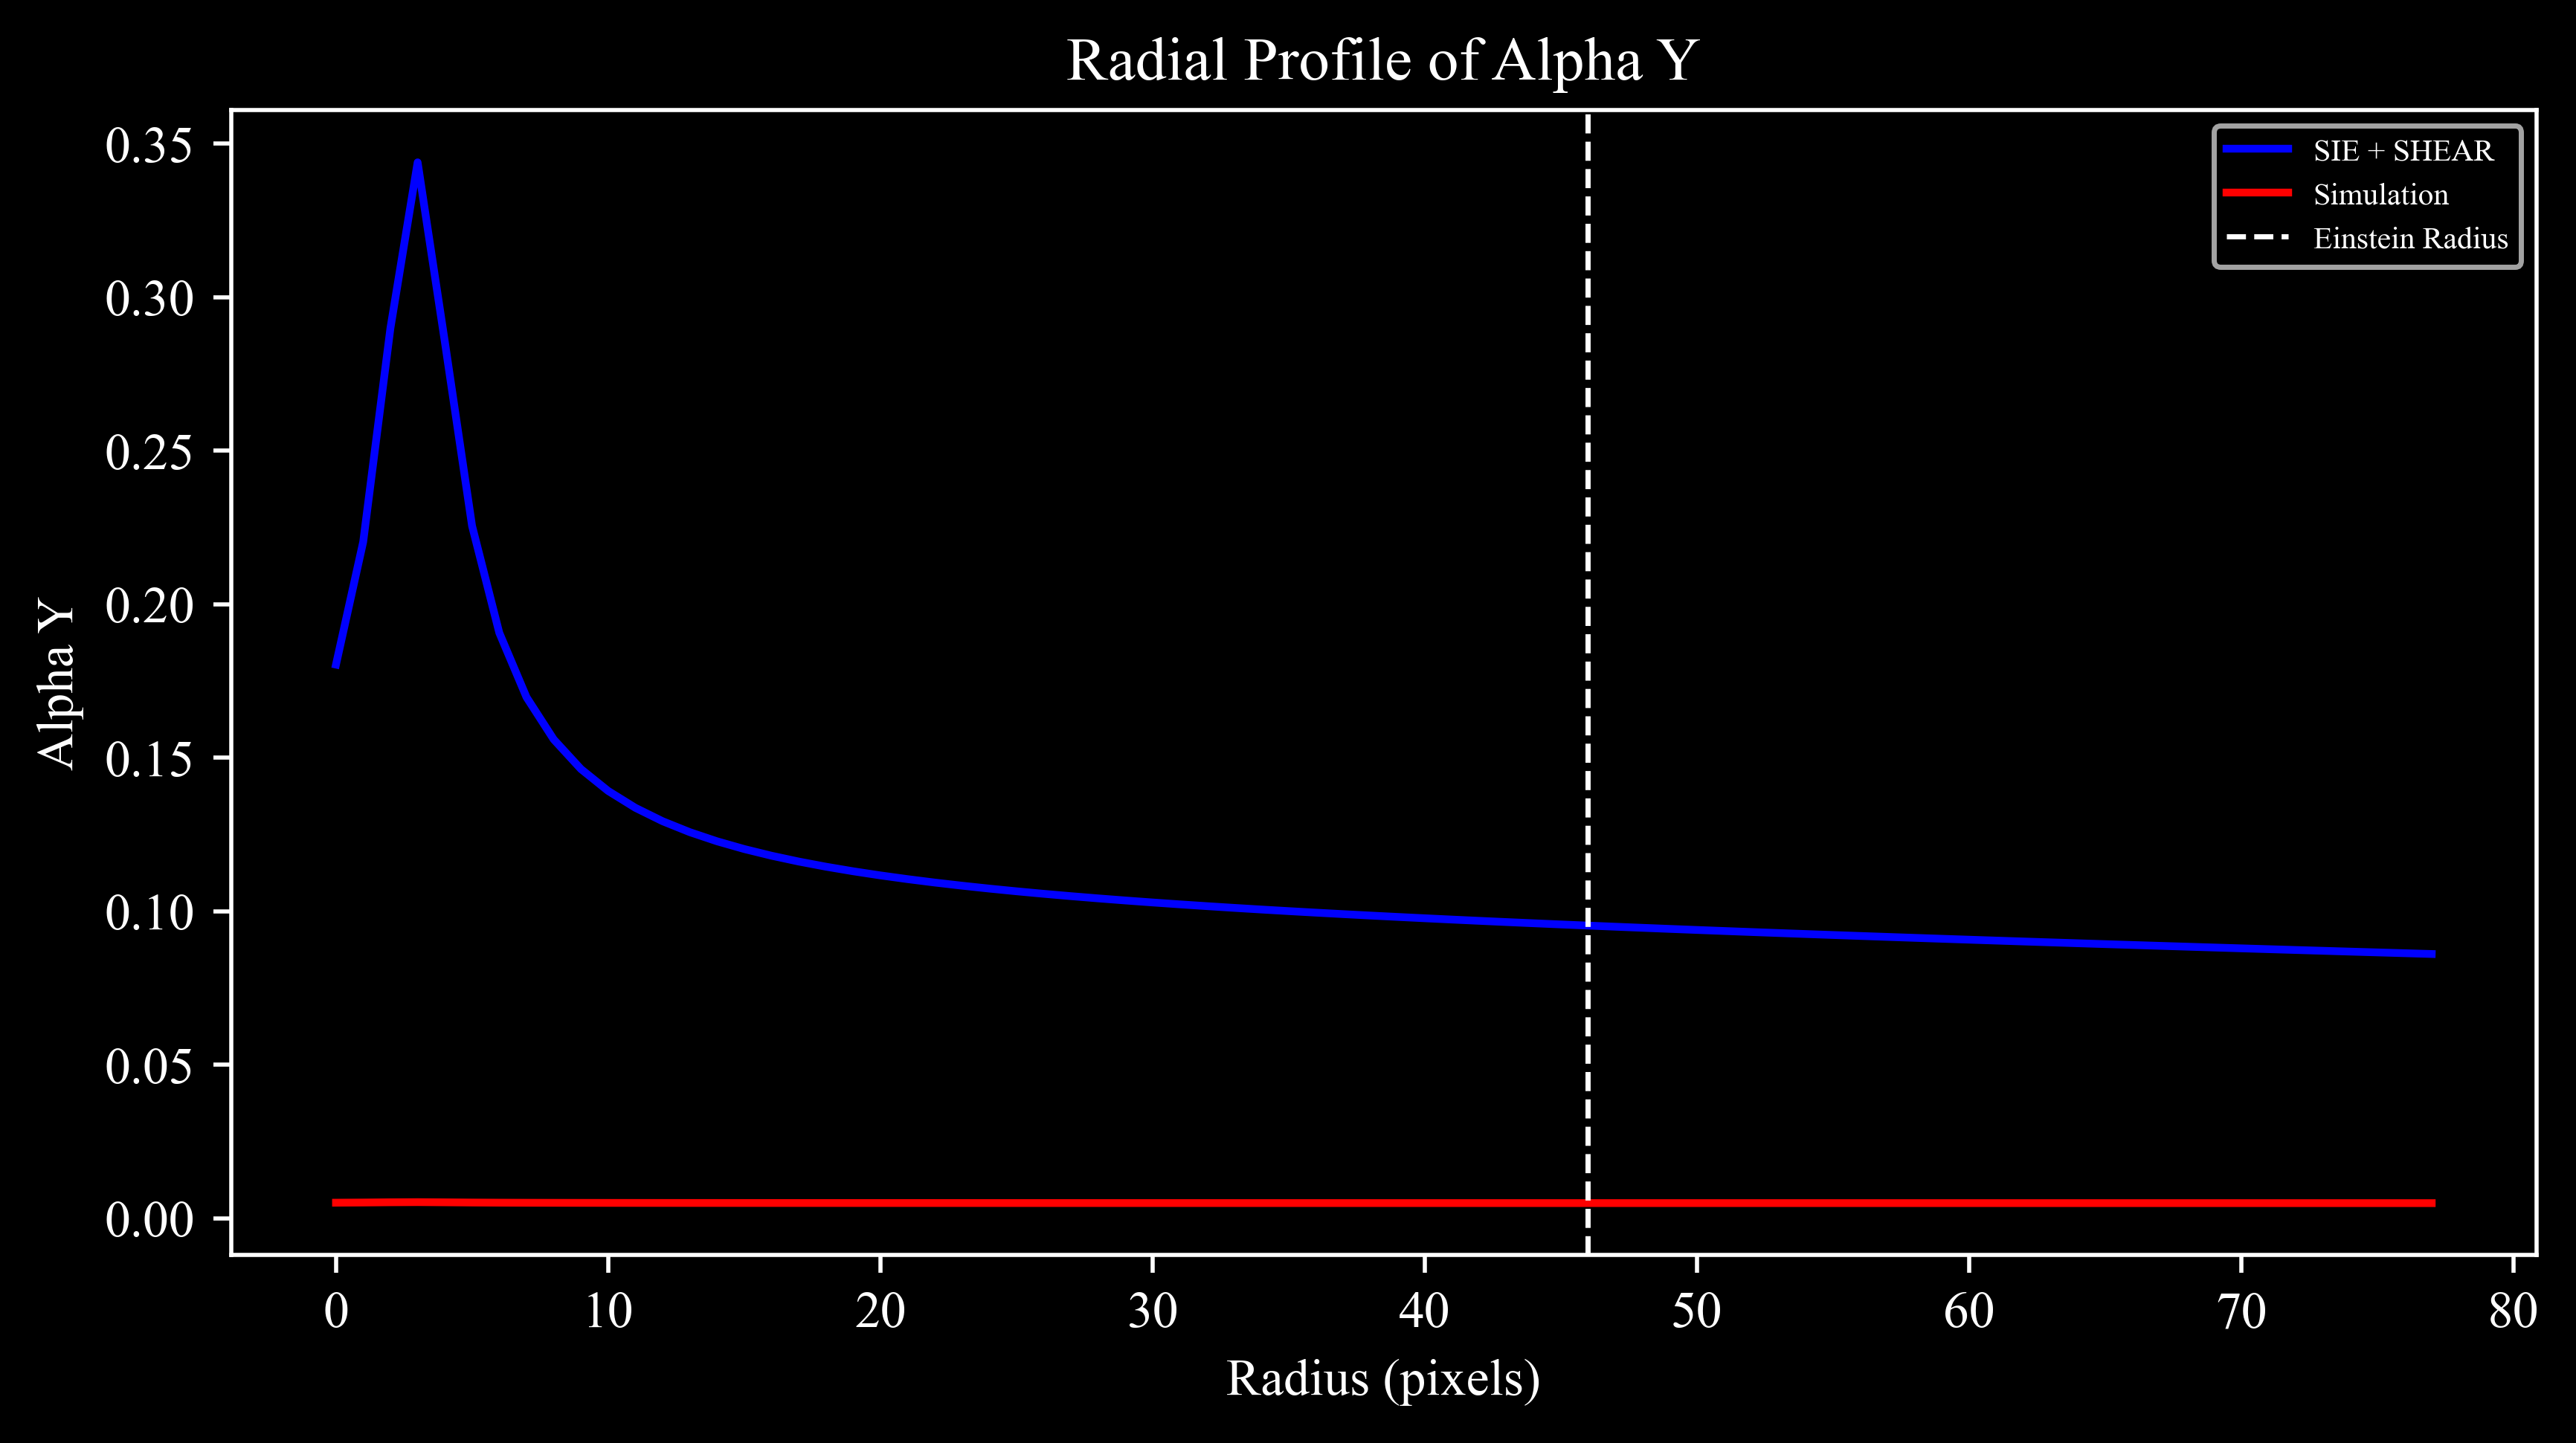

In [90]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(alpha_radial_y)), alpha_radial_y, color='b', label='SIE + SHEAR')
plt.plot(np.arange(len(alpha_radial_sim_y)), alpha_radial_sim_y, color='r', label='Simulation')
plt.axvline(x=46, color='w', linestyle='--', linewidth=1, label='Einstein Radius')
plt.xlabel('Radius (pixels)', color='w')
plt.ylabel('Alpha Y', color='w')
plt.title('Radial Profile of Alpha Y', color='w')
plt.legend(fontsize=6)
plt.show()

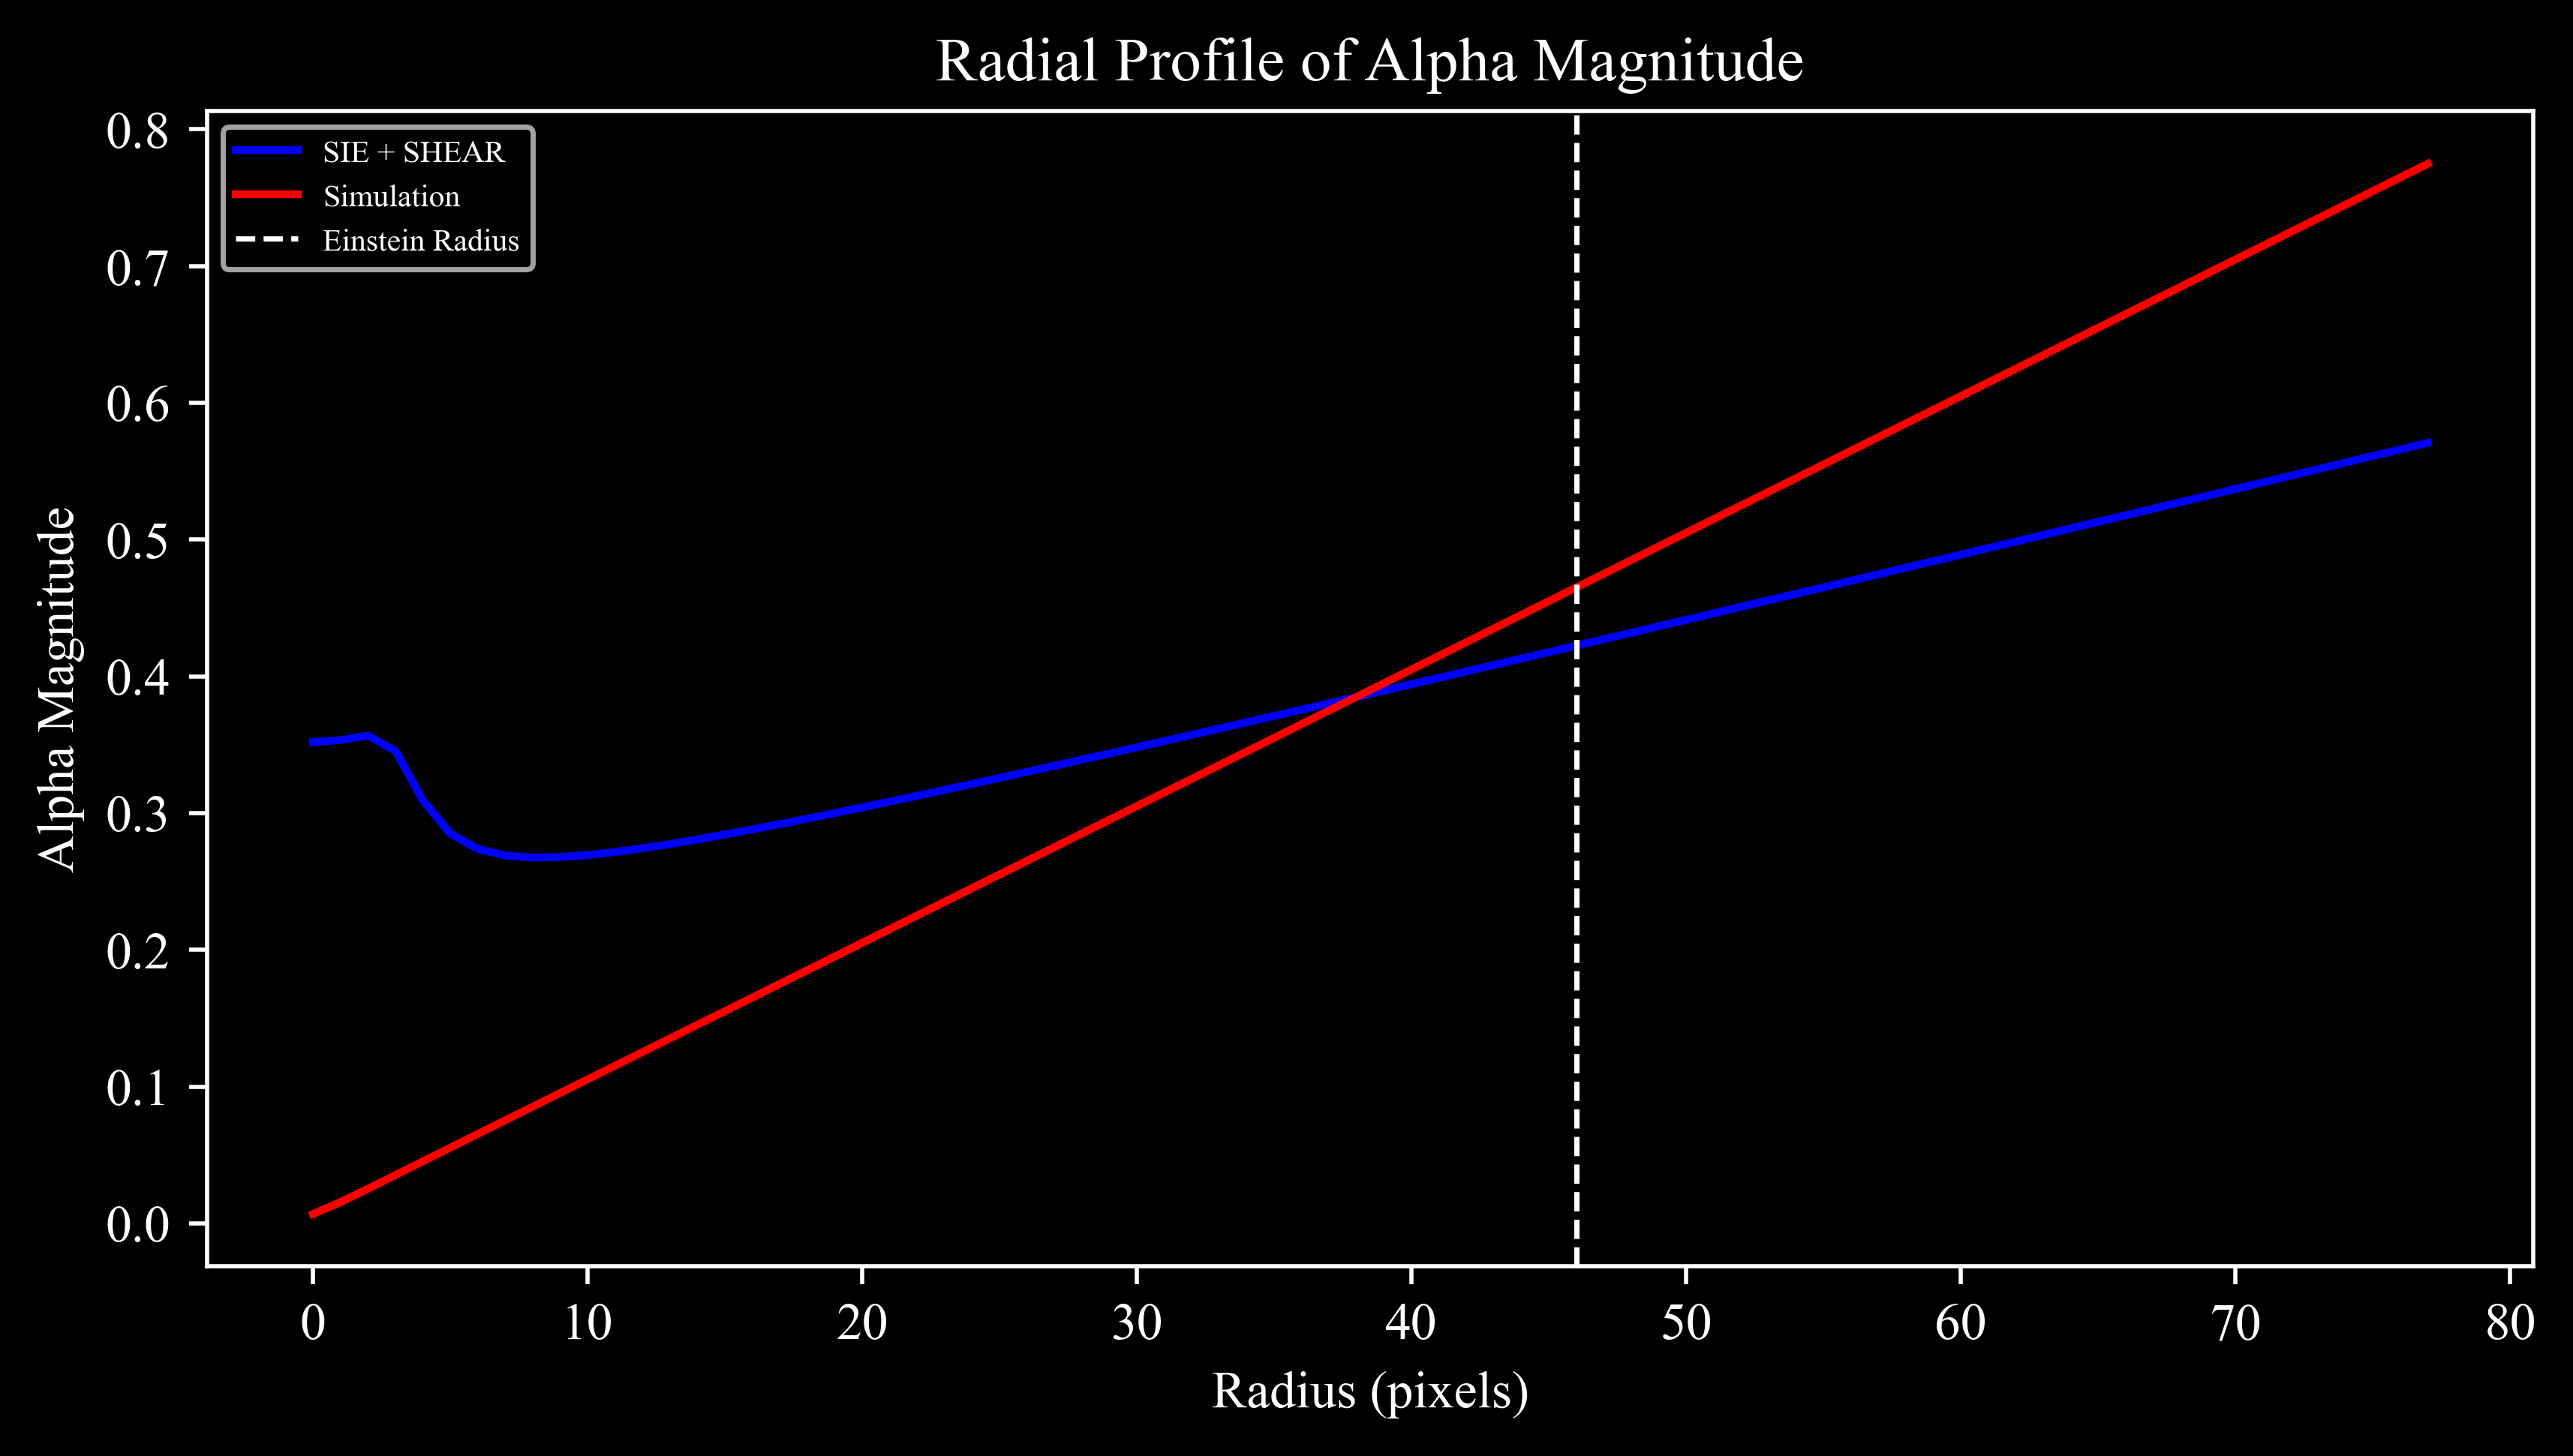

In [93]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(alpha_radial_sum)), alpha_radial_sum, color='b', label='SIE + SHEAR')
plt.plot(np.arange(len(alpha_radial_sim_sum)), alpha_radial_sim_sum, color='r', label='Simulation')
plt.axvline(x=46, color='w', linestyle='--', linewidth=1, label='Einstein Radius')
plt.xlabel('Radius (pixels)', color='w')
plt.ylabel('Alpha Magnitude', color='w')
plt.title('Radial Profile of Alpha Magnitude', color='w')
plt.legend(fontsize=6)
plt.show()